## Week2 Work
### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import joblib

## Revisiting the dataset

In [2]:
df = pd.read_csv('../week1.csv')
df.head()

,Unnamed: 0,id,date,likes,content,username,media,inferred company,has_media,hour,day,word_count,char_count
0,0,1,2020-12-12 00:47:00,1,"spend your weekend morning with a ham, egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,1,0,Saturday,29,181
1,1,2,2018-06-30 10:04:20,2750,watch rapper <mention> freestyle for over an h...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,1,10,Saturday,10,73
2,2,3,2020-09-29 19:47:28,57,canadian armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,1,19,Tuesday,14,104
3,3,4,2020-10-01 11:40:09,152,"1st in europe to be devastated by covid-19, it...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,1,11,Thursday,22,140
4,4,5,2018-10-19 14:30:46,41,congratulations to pauletha butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,1,14,Friday,26,199


## Introducing polarity of the content

In [3]:
df['sentiment'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()

,Unnamed: 0,id,date,likes,content,username,media,inferred company,has_media,hour,day,word_count,char_count,sentiment
0,0,1,2020-12-12 00:47:00,1,"spend your weekend morning with a ham, egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,1,0,Saturday,29,181,0.1750
1,1,2,2018-06-30 10:04:20,2750,watch rapper <mention> freestyle for over an h...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,1,10,Saturday,10,73,0.0000
2,2,3,2020-09-29 19:47:28,57,canadian armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,1,19,Tuesday,14,104,-0.1000
3,3,4,2020-10-01 11:40:09,152,"1st in europe to be devastated by covid-19, it...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,1,11,Thursday,22,140,0.5000
4,4,5,2018-10-19 14:30:46,41,congratulations to pauletha butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,1,14,Friday,26,199,0.0625


In [4]:
df.drop(columns=['content', 'id', 'date', 'media', 'Unnamed: 0'], axis=1, inplace=True)

In [5]:
df.columns

Index(['likes', 'username', 'inferred company', 'has_media', 'hour', 'day',
       'word_count', 'char_count', 'sentiment'],
      dtype='object')

## Encoding categorical variables

In [6]:
le = LabelEncoder()
le_company = LabelEncoder()
df['company_encoded'] = le_company.fit_transform(df['inferred company'])

le_username = LabelEncoder()
df['username_encoded'] = le_username.fit_transform(df['username'])

le_day = LabelEncoder()
df['day_encoded'] = le_day.fit_transform(df['day'])

df['log_likes'] = np.log1p(df['likes'])
df.drop(columns=['inferred company', 'username', 'day', 'likes'], axis=1, inplace=True)
df.head()

,has_media,hour,word_count,char_count,sentiment,company_encoded,username_encoded,day_encoded,log_likes
0,1,0,29,181,0.1750,166,860,2,0.693147
1,1,10,10,73,0.0000,87,441,2,7.919720
2,1,19,14,104,-0.1000,35,155,5,4.060443
3,1,11,22,140,0.5000,189,508,4,5.030438
4,1,14,26,199,0.0625,87,112,0,3.737670


## Test-Train splitting and model training

In [7]:
X = df[['word_count', 'char_count', 'has_media', 'hour', 'sentiment', 'company_encoded', 'username_encoded', 'day_encoded']]
y = df['log_likes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

RMSE: 0.9797156344256986
R2: 0.8631401139458883


## Running RandomsearchCV and gridsearchCV

In [9]:
# param_grid = {
#     'n_estimators': [150, 200, 250],
#     'max_depth': [10, 12, 14],
#     'min_samples_split': [8, 10, 12],
#     'min_samples_leaf': [4, 5, 6],
# }

# grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Best Estimator:", grid_search.best_estimator_)

# gives the following as best params
# RandomForestRegressor(max_depth=14, min_samples_leaf=4, min_samples_split=8, n_estimators=200)

## Running the final model with best parameters

In [10]:
model = RandomForestRegressor(max_depth=14, min_samples_leaf=4, min_samples_split=8, n_estimators=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Test R2:", r2_score(y_test, y_pred))
print("Train R2:", r2_score(y_train, y_pred_train))

Train RMSE: 0.8163011591719247
Test RMSE: 0.9995137076166326
Test R2: 0.8575529020416323
Train R2: 0.9019555182481809


## Checking feature importances

            Feature  Importance
6  username_encoded    0.513756
5   company_encoded    0.426252
1              hour    0.023020
3        char_count    0.011815
4         sentiment    0.009684
0         has_media    0.009397
7       day_encoded    0.006076
2        word_count    0.000000


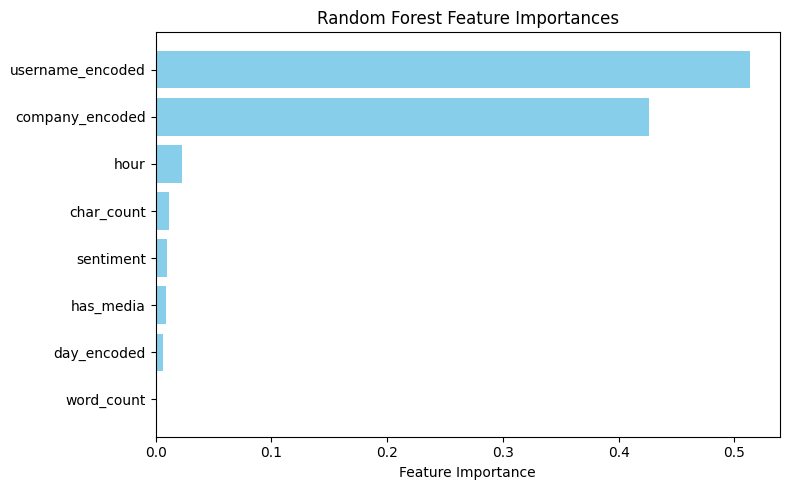

In [11]:
importances = model.feature_importances_
feature_names = ['has_media', 'hour', 'word_count', 'char_count','sentiment', 'company_encoded', 'username_encoded','day_encoded']

importance_df = pd.DataFrame({'Feature': feature_names,'Importance': importances}).sort_values(by='Importance', ascending=False)

print(importance_df)
plt.figure(figsize=(8, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()  # Highest importance on top
plt.tight_layout()
plt.show()

## Saving the model

In [13]:
import joblib
joblib.dump(model, 'like_predictor.pkl')
joblib.dump(le_company, 'le_company.pkl')
joblib.dump(le_username, 'le_username.pkl')
joblib.dump(le_day, 'le_day.pkl')

['le_day.pkl']

## API
Example of how to run the API:

```zsh
$ curl -X POST http://127.0.0.1:5000/predict -H "Content-Type: application/json" -d '{
        "has_media": 1,
        "hour": 14,
        "word_count": 25,
        "char_count": 150,
        "sentiment": 0.2,
        "company": "independent",
        "username":  "MKWilliamsRome",
        "day": "Monday"
      }'
{
  "predicted_likes": 283
}
```


## Improvements
The API should ideally only take the username, company, presence of media and content and all feature manipulation should be conducted at the backend by the API itself. 
As for the model improvement part, feature enhancement should be a must. Content is a very useful feature and only creating sentiment and word, char counts as features out of that seems like a waste. Moreover more features should also be tried to obtained out of company and username if possible as well. Using something else like target-encoding would also have been worth a try. Using XGBoost or Neural Networks would also have been much better and resulted in a much more accurate and generalized model.